# Magnetic Moments

NDS keep a library of measurements of the magnetic moments of all known nuclei. The graphs below show an interactive visualisation of the schmidt lines and the behaviour for individual shell states.

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

df = pd.read_csv("magn_mom_recomm.csv")
df["yearly"]= df["halflife"].str.find("y")
df["daily"]= df["halflife"].str.find("d")

df = df[ (df["halflife"] == "stable") | (df["yearly"] != -1) ]
print(df)


       z  n.n+n.z symbol energy [keV]      halflife  spin  \
1      1        1      H            0        stable  1/2+   
2      1        2      H            0        stable    1+   
3      1        3      H            0       12.33 y  1/2+   
4      2        3     He            0        stable  1/2+   
5      3        6     Li            0        stable    1+   
...   ..      ...    ...          ...           ...   ...   
2145  95      242     Am           49         152 y    5-   
2146  95      243     Am            0        7364 y  5/2-   
2148  96      243     Cm            0        29.1 y  5/2+   
2149  96      245     Cm            0        8423 y  7/2+   
2150  96      247     Cm            0  1.56 x 107 y  9/2-   

     magnetic dipole [nm] method  \
1         +2.792847351(9)      R   
2         +0.857438231(5)      R   
3       +2.978962460(14))      R   
4          -2.12762531(3)      R   
5            +0.822043(3)    NMR   
...                   ...    ...   
2145           

FAILED X nan
FAILED X nan
FAILED X nan
FAILED X nan
FAILED X nan
FAILED X nan
FAILED X nan
FAILED X nan
FAILED X nan
FAILED X if 2-


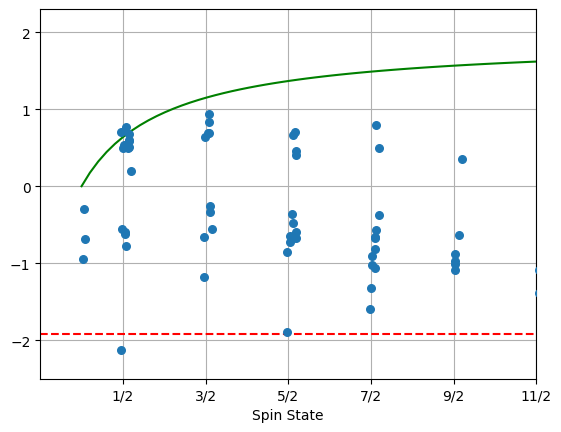

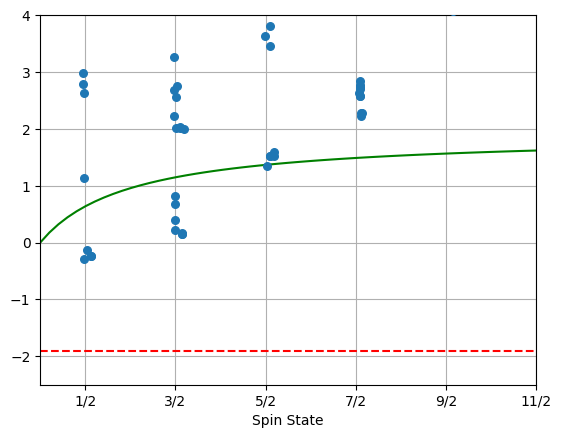

In [119]:
labels = []
values = []
stability = []
for v in df["magnetic dipole [nm]"]:
    try:
        values.append(float(v.split("(")[0]))
    except:
        values.append(0)
for x in df["spin"]:
    try:
        x = x.replace("(","").replace(")","")
        sign = x[-1]
        # print(x, (sign + x[0:-1]), float(eval(sign + x[0:-1])))
        labels.append( float(eval(sign + x[0:-1])) )
    except:
        print("FAILED X", x)
        labels.append(0.0)


df["nm"] = values
df["s"] = labels    
df["neutron"] = df["n.n+n.z"] - df["z"] 
# ndf = df[df.s % 1 != 0]


ndf = df
ndf = ndf[(ndf["z"] % 2 == 0) & (ndf["neutron"] % 2 != 0) ]
plt.scatter(np.abs(ndf["s"])*2 + 0.001 * (-50+ndf["n.n+n.z"]), ndf["nm"], s=30, zorder=20)
plt.xlim([0.0,14])
plt.xticks([1, 3, 5, 7, 9, 11, 13], ['1/2', '3/2', '5/2', '7/2', '9/2', '11/2', '13/2'])
plt.axhline(y=-1.913, color='r', linestyle='--')
x = np.linspace(0, 20, 100)
y = 1.913 * x / 2 / (x / 2 + 1)
plt.plot(x, y, color='g')
plt.grid(1)
plt.ylim([-2.5,2.3])
plt.xlim([-1,11])
plt.xlabel("Spin State")
plt.show()


ndf = df
ndf = ndf[(ndf["z"] % 2 != 0) & (ndf["neutron"] % 2 == 0) ]
plt.scatter(np.abs(ndf["s"])*2 + 0.001 * (-50+ndf["n.n+n.z"]), ndf["nm"], s=30, zorder=20)
plt.xlim([0.0,14])
plt.xticks([1, 3, 5, 7, 9, 11, 13], ['1/2', '3/2', '5/2', '7/2', '9/2', '11/2', '13/2'])
plt.axhline(y=-1.913, color='r', linestyle='--')
x = np.linspace(0, 20, 100)
y = 1.913 * x / 2 / (x / 2 + 1)
plt.plot(x, y, color='g')
plt.grid(1)
plt.ylim([-2.5,4.0])
plt.xlim([0,11])
plt.xlabel("Spin State")
plt.show()